<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Exercise 1) Stack Overflow Text dataset Classification</b><br>
</div>

In [1]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz

--2024-12-11 11:50:38--  https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 142.251.179.207, 64.233.180.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6053168 (5.8M) [application/x-gzip]
Saving to: ‘stack_overflow_16k.tar.gz’

stack_overflow_16k. 100%[===================>]   5.77M  --.-KB/s    in 0.06s   

2024-12-11 11:50:38 (94.7 MB/s) - ‘stack_overflow_16k.tar.gz’ saved [6053168/6053168]



In [2]:
!tar -xzf stack_overflow_16k.tar.gz

In [63]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import losses

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [4]:
print(len(os.listdir('train/csharp')))
print(len(os.listdir('train/java')))
print(len(os.listdir('train/javascript')))
print(len(os.listdir('train/python')))

2000
2000
2000
2000


### Loading the data

In [5]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'test',
    batch_size=batch_size)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.
Found 8000 files belonging to 4 classes.
Using 1600 files for validation.
Found 8000 files belonging to 4 classes.


### Standardizing and Tokenizing

In [6]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return stripped_html

In [7]:
max_features = 10000
sequence_length = 300

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length,
    ngrams=(1,2))

In [8]:
# adapt to get the tokens (vocabulary)
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [9]:
for data, label in raw_train_ds.take(3):
    print("data: ", data.shape)
    print('label: ', label.shape)

data:  (32,)
label:  (32,)
data:  (32,)
label:  (32,)
data:  (32,)
label:  (32,)


In [10]:
for data in train_text.take(3):
    print("data: ", data.shape)

data:  (32,)
data:  (32,)
data:  (32,)


In [11]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'the',
 '=',
 'to',
 'i',
 'a',
 'in',
 'is',
 '{.',
 'and',
 'of',
 'if',
 'for',
 'it',
 'that',
 'this',
 '+',
 'new',
 'have',
 '}.',
 'with',
 '= new',
 'string',
 'not',
 'my',
 '.',
 'but',
 'return',
 'public',
 'blank',
 'an',
 'from',
 'be',
 'am',
 'class',
 'can',
 'as',
 'i have',
 'code',
 'on',
 '==',
 'int',
 'how',
 'void',
 'do',
 '}..',
 'i am',
 'want',
 'or',
 'when',
 'get',
 'file',
 'using',
 'like',
 'of the',
 '//',
 'function',
 'var',
 'static',
 'in the',
 '*',
 '""',
 '-',
 'so',
 "i'm",
 'are',
 'want to',
 'at',
 'what',
 'would',
 'you',
 'which',
 '{',
 'there',
 'will',
 'use',
 'i want',
 'list',
 'value',
 'all',
 'one',
 'method',
 'by',
 'any',
 'need',
 'object',
 '&lt;',
 'else',
 'trying',
 'me',
 'some',
 ':',
 'trying to',
 'is the',
 'number',
 'to the',
 'then',
 'print',
 'have a',
 'way',
 '"how',
 'line',
 'should',
 'how to',
 'private',
 '}',
 'error',
 'only',
 'has',
 '"" +',
 'array',
 'data',
 'into',
 'know',
 'jus

In [12]:
vectorize_layer("this code is such a mess ARRR!!")

<tf.Tensor: shape=(300,), dtype=int64, numpy=
array([  16,   39,    8,  473,    6,    1,    1,  483,  550,    1, 2456,
          1,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
     

### Vectorizing the whole data

In [50]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1) # was it realy needed ???
  return vectorize_layer(text), label

In [51]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [52]:
for t,l in train_ds.take(1):
  print(t, l)

tf.Tensor(
[[1217    8   31 ...    1   77 1358]
 [   1    1    1 ...    0    0    0]
 [1990  384   30 ...    0    0    0]
 ...
 [1468   70   54 ...    0    0    0]
 [   1  706 1008 ...    0    0    0]
 [ 626   34    5 ...   23    1    3]], shape=(32, 300), dtype=int64) tf.Tensor([1 0 2 3 1 0 1 1 2 2 3 3 2 0 1 1 3 2 3 2 0 3 1 2 2 0 0 2 0 3 0 1], shape=(32,), dtype=int32)


In [53]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

### Create the model and train it

In [166]:
embedding_dim = 16
# max_features = 10000

In [ ]:
model = tf.keras.Sequential([
  layers.Embedding(max_features, embedding_dim), # (10000, 16)
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(16, activation='relu'),
  layers.Dense(4)
  ])

In [190]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ (None, None, 16)            │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, None, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_15          │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481,022 (1.83 MB)

 Trainable params: 160,340 (626.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,682 (1.22 MB)

In [173]:
model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [174]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=4,
    verbose=1,
    min_lr=1e-7
)

In [175]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=60,
    callbacks=[early_stopping, reduce_lr])

Epoch 1/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.3793 - sparse_categorical_accuracy: 0.3009 - val_loss: 1.3426 - val_sparse_categorical_accuracy: 0.3781 - learning_rate: 0.0010
Epoch 2/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.3130 - sparse_categorical_accuracy: 0.3930 - val_loss: 1.1996 - val_sparse_categorical_accuracy: 0.4581 - learning_rate: 0.0010
Epoch 3/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.1646 - sparse_categorical_accuracy: 0.4871 - val_loss: 1.0264 - val_sparse_categorical_accuracy: 0.5969 - learning_rate: 0.0010
Epoch 4/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9965 - sparse_categorical_accuracy: 0.6171 - val_loss: 0.8796 - val_sparse_categorical_accuracy: 0.6837 - learning_rate: 0.0010
Epoch 5/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8543 - sparse_categorical_accuracy: 0.6826 - val_loss: 0.7675 - val_sparse_categorical_accuracy: 0.7194 - learning_rate: 0.0010
Epoch 6/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/ste

In [176]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5681 - sparse_categorical_accuracy: 0.7849
Loss:  0.5553783774375916
Accuracy:  0.7901250123977661


### Plotting the loss and accuracy

In [177]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy', 'learning_rate'])

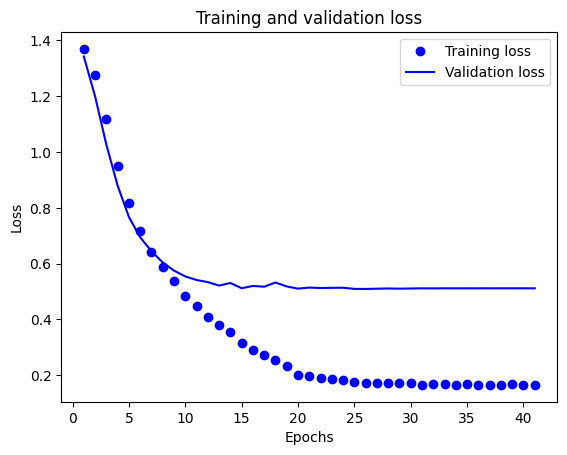

In [178]:
acc = history_dict['sparse_categorical_accuracy']
val_acc = history_dict['val_sparse_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

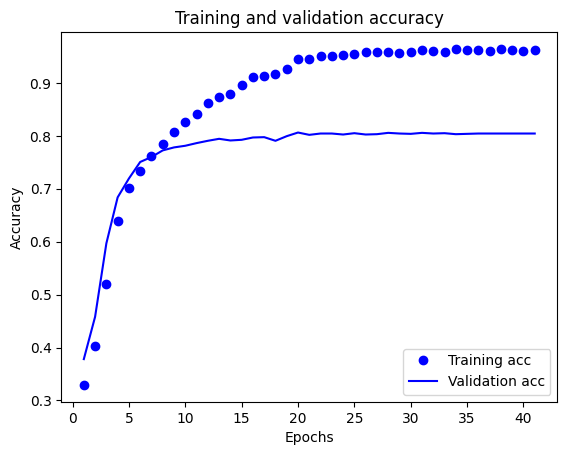

In [179]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

### Create export model

In [180]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('softmax')
])

export_model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [187]:
export_model.evaluate(raw_test_ds)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.7863


[0.0, 0.0, 0.7901250123977661, 0.7901250123977661]

In [211]:
classes = raw_test_ds.class_names
classes

['csharp', 'java', 'javascript', 'python']

In [226]:
examples = [
  ['this is my funtion in python: def func(c): print(c)'],
]

classes[np.argmax(export_model.predict(tf.data.Dataset.from_tensor_slices(examples)))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


'python'

In [229]:
examples = [
  ['what is the problem with this code?  class A(b){ system.out.pritln(b)}'],
]

classes[np.argmax(export_model.predict(tf.data.Dataset.from_tensor_slices(examples)))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


'java'